# Algebra - Vectors

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Scalars (Rank 0 Tensors) in Base Python

In [2]:
x = 25
x

25

In [3]:
type(x) # if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library

int

In [4]:
y = 3

In [5]:
py_sum = x + y
py_sum

28

In [6]:
type(py_sum)

int

In [7]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [8]:
type(float_sum)

float

## Vectors (Rank 1 Tensors) in NumPy

In [9]:
x = np.array([25, 2, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  2,  5])

In [10]:
len(x)

3

In [11]:
x.shape

(3,)

In [12]:
type(x)

numpy.ndarray

In [13]:
x[0] # zero-indexed

25

In [14]:
type(x[0])

numpy.int32

### Vector Transposition

In [15]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([25,  2,  5])

In [16]:
x_t.shape

(3,)

In [17]:
# ...but it does we use nested "matrix-style" brackets: 
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [18]:
y.shape

(1, 3)

In [19]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent: 
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [20]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [21]:
# Column vector can be transposed back to original row vector: 
y_t.T 

array([[25,  2,  5]])

In [22]:
y_t.T.shape

(1, 3)

In [23]:
y

array([[25,  2,  5]])

In [24]:
y.T.T

array([[25,  2,  5]])

### Zero Vectors

Have no effect if added to another vector

In [25]:
z = np.zeros(3)
z

array([0., 0., 0.])

In [26]:
np.full((1, 3), fill_value=10.)

array([[10., 10., 10.]])

### Vector dimensions and coordinate system

Let's plot some vectors!

In [27]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.
    Original source: Jon Krohn's ML Fundations.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)


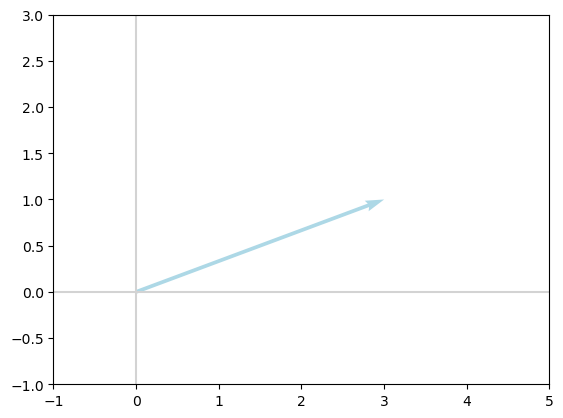

In [28]:
# Let's define a vector
x = np.array([3, 1])

# Now we can use our functions to plot it
plot_vectors([x], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 3)

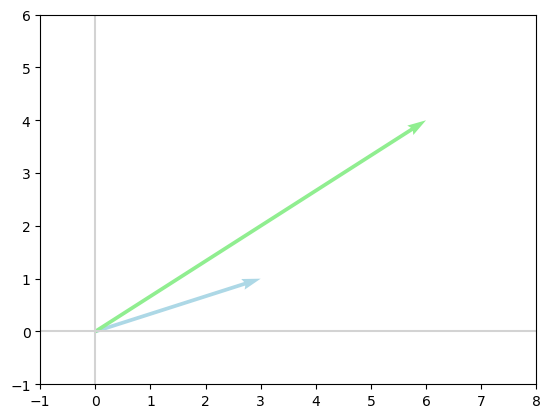

In [29]:
# Now let's create a second vector y and plot it with x
y = np.array([6, 4])

# Now we can use our functions to plot it
plot_vectors([x, y], ['lightblue', 'lightgreen'])
plt.xlim(-1, 8)
_ = plt.ylim(-1, 6)

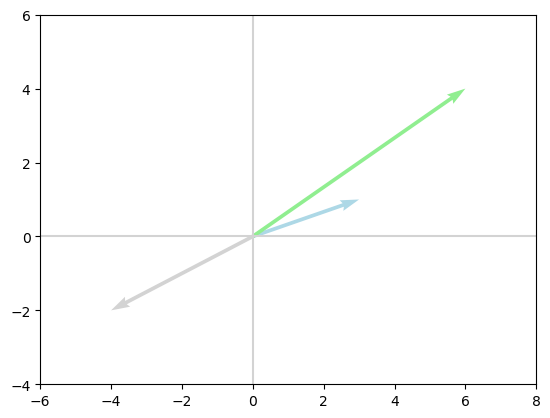

In [30]:
# Let's add one more
z = np.array([-4, -2])

# Now we can use our functions to plot it
plot_vectors([x, y, z], ['lightblue', 'lightgreen', 'lightgrey'])
plt.xlim(-6, 8)
_ = plt.ylim(-4, 6)

### Basic Vectors Operations


#### Sum of vectors

In [31]:
# Now let's create a second vector y and plot it with x
x = np.array([3, 6])
y = np.array([6, 4])

vec_sum = x + y
vec_sum

array([ 9, 10])

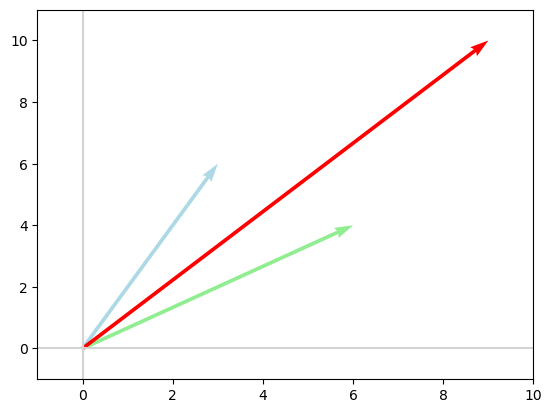

In [32]:
# Let's plot the result
plot_vectors([x, y, vec_sum], ['lightblue', 'lightgreen', 'red'])
plt.xlim(-1, 10)
_ = plt.ylim(-1, 11)

#### Multiplication by scalar

In [33]:
# Now let's create a second vector y and plot it with x
x = np.array([3, 1])

x_2 = x * 2
x_2

array([6, 2])

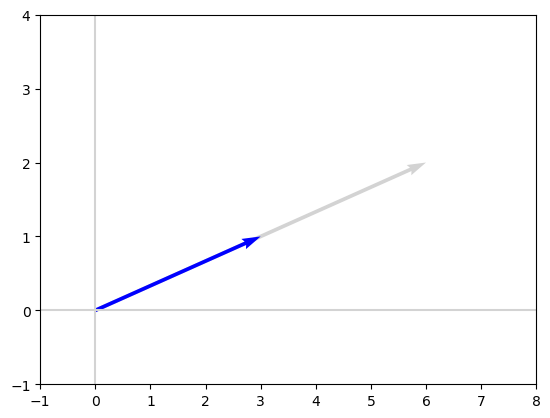

In [34]:
# Let's plot the result
plot_vectors([x_2, x], ['lightgray', 'blue'])
plt.xlim(-1, 8)
_ = plt.ylim(-1, 4)

In [35]:
x = np.array([3, 6])
y = np.array([6, 4])

x + (-1 * y)

array([-3,  2])

In [36]:
x - y

array([-3,  2])

#### Vector multiplication or dot-product

In [37]:
x = np.array([3, 1])
y = np.array([6, 4])

vec_dot = x * y
vec_dot

array([18,  4])

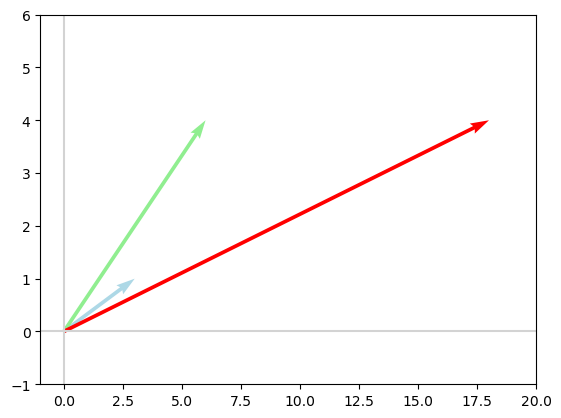

In [38]:
# Let's plot the result
plot_vectors([x, y, vec_dot], ['lightblue', 'lightgreen', 'red'])
plt.xlim(-1, 20)
_ = plt.ylim(-1, 6)

### $L^2$ Norm

In [39]:
x = np.array(
  [
    [25, 2, 5, 0.1],
    [56, 6, 2, 0.2],
    [19, 16, 6, 0.01],
  ]
)
x

array([[2.5e+01, 2.0e+00, 5.0e+00, 1.0e-01],
       [5.6e+01, 6.0e+00, 2.0e+00, 2.0e-01],
       [1.9e+01, 1.6e+01, 6.0e+00, 1.0e-02]])

In [44]:
#x_norm = (25**2 + 2**2 + 5**2)**(1/2)
x_norm = np.linalg.norm(x, axis=1)
x_norm

array([25.57361922, 56.3563661 , 25.55386664])

In [45]:
x.T

array([[2.5e+01, 5.6e+01, 1.9e+01],
       [2.0e+00, 6.0e+00, 1.6e+01],
       [5.0e+00, 2.0e+00, 6.0e+00],
       [1.0e-01, 2.0e-01, 1.0e-02]])

In [46]:
l2_norm_x = (x.T / x_norm).T
l2_norm_x

array([[9.77569885e-01, 7.82055908e-02, 1.95513977e-01, 3.91027954e-03],
       [9.93676560e-01, 1.06465346e-01, 3.54884486e-02, 3.54884486e-03],
       [7.43527399e-01, 6.26128336e-01, 2.34798126e-01, 3.91330210e-04]])

In [47]:
np.linalg.norm(l2_norm_x, axis=1)

array([1., 1., 1.])

In [48]:
np.linalg.norm(l2_norm_x)

1.7320508075688772

In [49]:
import math

math.sqrt(25**2 + 2**2 + 5**2)

25.573423705088842

In [50]:
np.linalg.norm(x, 2)

65.37982769716564

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

### $L^1$ Norm

In [51]:
x = [25, 2, 5]

In [52]:
np.abs(25) + np.abs(2) + np.abs(5)

32

In [53]:
np.linalg.norm(x, 1)

32.0

In [54]:
np.linalg.norm([25, 2, -5], 1)

32.0

### Distance between vectors

In [55]:
# Now let's create a second vector y and plot it with x
x = np.array([3, 1])
y = np.array([6, 4])

# L2 distance (using L2 norm)
vec_dist = np.linalg.norm(x - y, 2)
vec_dist

4.242640687119285

In [56]:
# Now let's create a second vector y and plot it with x
x = np.array([3, 1])
y = np.array([6, 4])

# L1 distance (using L1 norm)
vec_dist = np.linalg.norm(x - y, 1)
vec_dist

6.0

Let's say we have a database with data about people like age, height, and weight, we could use vector distance to find people with similar characteristics based on our features:

In [57]:
x = np.array([21, 180, 78])
y = np.array([24, 180, 85])
z = np.array([54, 175, 65])

print("||x - y||:", np.linalg.norm(x - y, 2))
print("||y - z||:", np.linalg.norm(y - z, 2))
print("||x - z||:", np.linalg.norm(x - z, 2))


||x - y||: 7.615773105863909
||y - z||: 36.40054944640259
||x - z||: 35.81898937714463


Vector **x** and **y** are the closest ones and we can also validate that using L2 distance metric.

In [58]:
from sklearn.metrics.pairwise import euclidean_distances

In [59]:
k = np.array([100, 20, 45])
euclidean_distances([x, y, z], [k])


array([[181.46625031],
       [181.59295141],
       [162.91408779]])